In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('seaborn-white')
# colorblind safe
plt.style.use('seaborn-colorblind')
plt.style.use('tableau-colorblind10')

# width and precision for f strings
width = 10
precision = 4

# default sizes for plots
# https://matplotlib.org/3.3.0/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

# other settings
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
%config IPCompleter.greedy=True

## notes
* book events some are fraudulent
* build model and put into production
* deploy to AWS
* web service that can pull online
* give probability of fraud?
* or why we think fraud for each
* dashboard shows all fraud
* and then user can categorize if fraud
* and save it in database
* anomaly detection using supervised classification
* make plots


In [2]:
data = pd.read_json('../data/data.zip')

In [105]:
# data.to_csv('../data/data_as_csv', index=False)

In [4]:
data_sample = data.sample(frac=.10, random_state = 42)

In [5]:
data_sample.to_csv('../data/test_script_examples.csv', index=False)

In [126]:
data.info()

ERROR! Session/line number was not unique in database. History logging moved to new session 470
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts   

In [107]:
data.iloc[1063]

acct_type                                                       premium
approx_payout_date                                           1321578000
body_length                                                         717
channels                                                             11
country                                                              US
currency                                                            USD
delivery_method                                                  0.0000
description           <p>Agenda 21 is the United Nation's plan to de...
email_domain                                   takingourcountryback.net
event_created                                                1314452826
event_end                                                    1321146000
event_published                                      1,316,033,244.0000
event_start                                                  1321117200
fb_published                                                    

In [5]:
data.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0000,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,"1,263,109,838.0000",1265594400,0,0.0000,0,1.0000,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0000,Party Starz Ent & Diverse Int'l Group,0.0000,,,[],29.0000,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.7775,-80.1334,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0000,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,"1,293,833,295.0000",1296255600,0,868.0200,0,0.0000,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0000,RUF at Winthrop University,12.0000,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0000,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.7766,-79.9309,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0000,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,"1,291,091,908.0000",1295713800,0,"3,500.0000",0,nan,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0000,University Preparation School in collaboration...,0.0000,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0000,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.9442,-118.0804,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0000,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,"1,360,683,446.0000",1360702800,0,"1,167.3500",0,0.0000,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0000,,0.0000,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0000,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,nan,nan,None,None
4,premium,1297900800,2417,11,US,USD,0.0000,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,"1,291,994,966.0000",1297440000,1,"2,313.1500",0,0.0000,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0000,Arts & Business Council of Greater Boston,0.0000,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0000,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.3538,-71.0443,Fish & Richardson,MA


In [6]:
data['acct_type'].unique()

array(['fraudster_event', 'premium', 'spammer_warn', 'fraudster',
       'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock',
       'tos_warn', 'fraudster_att', 'spammer_web', 'spammer'],
      dtype=object)

In [7]:
data.groupby(by='acct_type').agg('count')

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
acct_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fraudster,437,437,437,437,437,425,437,437,437,437,423,437,437,437,437,272,437,437,437,437,437,437,437,437,413,437,413,437,437,437,418,437,437,437,437,437,437,437,330,330,330,330,330
fraudster_att,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,3,5,5,5,5,5,5,5,5,4,5,4,5,5,5,4,5,5,5,5,5,5,5,4,4,4,4,4
fraudster_event,851,851,851,851,851,851,851,851,851,851,772,851,851,851,851,244,851,851,851,851,851,851,851,851,821,851,821,851,851,851,753,851,851,851,851,851,851,851,589,589,589,589,589
locked,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,41,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,51,51,51,51,51
premium,12373,12373,12373,12297,12373,12369,12373,12373,12373,12373,12368,12373,12373,12373,12373,7950,12373,12373,12373,12373,12373,12373,12373,12373,12369,12373,12369,12373,12373,12373,12337,12373,12373,12373,12373,12373,12373,12373,11700,11700,11700,11700,11700
spammer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
spammer_limited,218,218,218,214,218,218,218,218,218,218,218,218,218,218,218,144,218,218,218,218,218,218,218,218,218,218,218,218,218,218,217,218,218,218,218,218,218,218,204,204,204,204,204
spammer_noinvite,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,59,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,82,82,82,82,82
spammer_warn,144,144,144,143,144,144,144,144,144,144,144,144,144,144,144,101,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,140,140,140,140,140


In [ ]:
# check dates
pd.to_datetime(data['event_created'], origin='julian')

In [18]:
# not premium
data['acct_type'][~data['acct_type'].isin(['premium'])].agg('count')
# data.groupby(by='acct_type').agg('count')

1964

In [13]:
type(data['acct_type'][1])

str

In [19]:
data['acct_type'][~data['acct_type'].isin(['premium'])].agg('count') / len(data)

0.13698821231777916

In [20]:
 len(data)

14337

In [24]:
data['fraud'] = 0

In [22]:
fraud_lst = ['fraudster_att', 'fraudster_event']

In [32]:
data['acct_type'].isin(fraud_lst)

0         True
1        False
2        False
3        False
4        False
         ...  
14332     True
14333    False
14334    False
14335    False
14336     True
Name: acct_type, Length: 14337, dtype: bool

In [38]:
data['fraud'][data['acct_type'].isin(fraud_lst)] = 1

/usr/local/anaconda3/envs/py377/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
nas = data[data.isna().any(axis=1)] 

[{'event_id': 527017,
  'cost': 25.0,
  'availability': 1,
  'quantity_total': 800,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 50.0,
  'availability': 1,
  'quantity_total': 100,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 550.0,
  'availability': 1,
  'quantity_total': 20,
  'quantity_sold': 0}]

In [70]:
pd.DataFrame.from_dict(data['ticket_types'][0])

,event_id,cost,availability,quantity_total,quantity_sold
0,527017,25.0000,1,800,0
1,527017,50.0000,1,100,0
2,527017,550.0000,1,20,0


In [97]:
tickettypes = data['ticket_types'].to_frame()

In [89]:
len(data['ticket_types'][0])

3

In [ ]:
data['ticket_types']

In [102]:

pd.json_normalize(data['ticket_types']) 

AttributeError: 'str' object has no attribute 'values'

In [98]:
pd.read_json(tickettypes, typ = 'series', orient='records')

ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

In [92]:
pd.concat((pd.read_json(data['ticket_types']) for d in data), axis=1)

ValueError: Invalid file path or buffer object type: <class 'pandas.core.series.Series'>

In [90]:
data['ticket_types'][0]

[{'event_id': 527017,
  'cost': 25.0,
  'availability': 1,
  'quantity_total': 800,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 50.0,
  'availability': 1,
  'quantity_total': 100,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 550.0,
  'availability': 1,
  'quantity_total': 20,
  'quantity_sold': 0}]

In [ ]:
pd.DataFrame.from_dict(data['ticket_types'][0] for row in data )

In [ ]:
for index, row in df.iterrows():
    print(row['c1'], row['c2'])

In [84]:
test = data.head()

In [86]:
blah = [row for row in test.iterrows()]

In [87]:
blah

[(0,
  acct_type                                               fraudster_event
  approx_payout_date                                           1266062400
  body_length                                                        3852
  channels                                                              5
  country                                                              US
  currency                                                            USD
  delivery_method                                                  0.0000
  description           <p><a href="http://s432.photobucket.com/albums...
  email_domain                                                  gmail.com
  event_created                                                1262739706
  event_end                                                    1265630400
  event_published                                      1,263,109,838.0000
  event_start                                                  1265594400
  fb_published                   

In [41]:
nas[nas['fraud'] == 1]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
51,fraudster_event,1329465600,536,6,US,USD,0.0000,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,1317544696,1329033600,"1,317,545,251.0000",1329015600,1,321.2800,0,nan,0,y,Mardi Gras Party and Celebration,32,7,1,1928009,,0.0000,CP Enterprises,0.0000,robert carter,CHECK,"[{'name': 'Royal Princesses and Knights', 'cre...",132.0000,132,1,"[{'event_id': 1928009, 'cost': 30.0, 'availabi...",77,1310957994,1,404 euclid ave,US,32.7021,-117.0851,The Jacobs Center at Market Creek,CA,1
149,fraudster_event,1335796200,1946,5,GB,GBP,0.0000,"<h1><span style=""font-size: x-large;"">You've d...",zumba-perth.com,1335366629,1335364200,"1,335,605,093.0000",1335358800,0,"8,991.2100",0,nan,0,n,Zumba Perth @ Bannatynes Health Club,36,22,0,3423729,,0.0000,,0.0000,,ACH,"[{'name': '', 'created': '2012-05-09 03:21:47'...",-3.0000,0,1,"[{'event_id': 3423729, 'cost': 35.0, 'availabi...",0,1335364397,1,St Catherine's Retail Park,GB,56.3998,-3.4387,,,1
212,fraudster_event,1353477600,0,5,US,USD,0.0000,,comcast.net,1345486002,1353045600,"1,345,486,206.0000",1353034800,0,86.3800,0,nan,1,y,Fun.,4,2,0,4159448,,0.0000,,0.0000,,,[],87.0000,87,1,"[{'event_id': 4159448, 'cost': 40.0, 'availabi...",0,1345486000,1,4746 N Racine Ave,US,41.9686,-87.6597,Riviera Theatre,IL,1
219,fraudster_event,1348916400,0,11,US,USD,0.0000,,gmail.com,1346730451,1348484400,nan,1348416000,0,0.0000,0,nan,1,y,Copy of RELATIONSHIP REVELATION CONFERENCE,42,0,0,4260346,,10.0000,Live Oak MBC,0.0000,,,[],nan,20,1,"[{'event_id': 4260346, 'cost': 10.0, 'availabi...",7,1346118291,1,526 E Hospital St,US,31.6036,-94.6508,Live Oak MIssionary Baptist Church,TX,1
259,fraudster_event,1355097600,0,0,US,USD,0.0000,,gmail.com,1351206387,1354665600,"1,351,206,620.0000",1354654800,0,570.0000,0,nan,0,y,mARTinis donation or purchase,29,4,0,4686063,,0.0000,,0.0000,Friends of The Allen School,CHECK,[],40.0000,40,1,"[{'event_id': 4686063, 'cost': 0.0, 'availabil...",20,1349477295,3,,None,nan,nan,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14304,fraudster_event,1361239200,44,0,,USD,0.0000,<p>musical jamboree for all music lovers</p>,usa.com,1357943181,1360807200,"1,357,943,753.0000",1358110800,0,"4,724.5500",0,0.0000,1,y,musical jamboree,16,8,0,5203138,,nan,kwame djan,nan,,,[],2.0000,2,1,"[{'event_id': 5203138, 'cost': 500.0, 'availab...",0,1357941170,3,700 Lafayette St,US,41.1724,-73.1907,Beacon Hall Events Center,CT,1
14318,fraudster_event,1359784800,448,0,US,USD,0.0000,<p>Help us produce this incredible experience....,gmail.com,1358975278,1359352800,"1,358,975,588.0000",1359342000,0,472.1600,0,nan,1,n,The NYC Speed Dating Expose,27,6,0,5307036,"We help those who are single, looking for mate...",0.0000,Dating NYC,0.0000,,,[],4.0000,4,1,"[{'event_id': 5307036, 'cost': 55.0, 'availabi...",0,1358975276,1,94 West Houston Street,US,40.7272,-74.0001,Madame X,NY,1
14325,fraudster_event,1360049400,996,0,US,USD,0.0000,"<p><span style=""font-size: medium;""><strong>Yo...",gmail.com,1359415821,1359617400,"1,359,418,319.0000",1359604800,0,0.0000,0,nan,1,n,Inner City Children’s Advocacy Center Dinner,45,0,0,5350990,"<p>Arthur Taylor..&nbsp;&nbsp; ""High Soc iety""...",0.0000,"Arthur Taylor.. ""High Society""",0.0000,,,[],2.0000,2,1,"[{'event_id': 5350990, 'cost': 649.65, 'availa...",0,1359415820,1,3280 Peachtree Rd NE,US,33.8444,-84.3704,AQUANOX,GA,1

In [43]:
nas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 2 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           6113 non-null   object 
 1   approx_payout_date  6113 non-null   int64  
 2   body_length         6113 non-null   int64  
 3   channels            6113 non-null   int64  
 4   country             6032 non-null   object 
 5   currency            6113 non-null   object 
 6   delivery_method     6097 non-null   float64
 7   description         6113 non-null   object 
 8   email_domain        6113 non-null   object 
 9   event_created       6113 non-null   int64  
 10  event_end           6113 non-null   int64  
 11  event_published     6014 non-null   float64
 12  event_start         6113 non-null   int64  
 13  fb_published        6113 non-null   int64  
 14  gts                 6113 non-null   float64
 15  has_analytics       6113 non-null   int64  
 16  has_h

In [49]:
checking = nas[nas['venue_country'].isna()]

In [50]:
checking[checking['venue_country'] == '']

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud


In [47]:
nas['venue_country'].unique()

array(['US', None, '', 'CA', 'GB', 'ES', 'AU', 'NL', 'DE', 'FR', 'NO',
       'AR', 'SG', 'BE', 'PH', 'MA', 'ID', 'NI', 'IE', 'VN', 'AE', 'DK',
       'BS', 'NZ', 'PR', 'KH', 'NA', 'KE', 'PK', 'SE', 'HR', 'VI', 'PL',
       'QA', 'FI', 'DZ', 'ZA', 'HU', 'SK', 'PT', 'RU', 'AT', 'TR', 'TT',
       'TH', 'CO', 'NG', 'OM', 'JE'], dtype=object)

In [48]:
nas[nas['venue_country'] == '']

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
54,fraudster,1312761600,3081,11,,GBP,0.0000,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,1311717051,1312329600,"1,311,720,716.0000",1312218000,0,"16,276.4500",0,nan,1,y,Real Estate Exhibition in London,32,9,0,1964043,"<p><span class=""vevent""><span class=""notransla...",0.0000,The London Connection,12.0000,,ACH,[],6.0000,6,0,"[{'event_id': 1964043, 'cost': 500.0, 'availab...",0,1311717050,1,Hammersmith Road,,0.0000,0.0000,Olympia Exhibition Hall,,0
161,fraudster,1337727600,39,5,US,USD,0.0000,<p>The Kimmel Center - Verizon Hall</p>,Safe-mail.net,1336338290,1337295600,"1,336,338,350.0000",1337284800,0,180.0000,0,nan,0,y,The Philadelphia Orchestra: Charles Dutoit,42,18,0,3493645,,0.0000,Shamekac,0.0000,,ACH,[],11.0000,11,1,"[{'event_id': 3493645, 'cost': 8.46, 'availabi...",0,1336338139,1,,,0.0000,0.0000,,,0
297,premium,1362700800,907,8,CA,CAD,0.0000,"<p><span style=""font-size: small;"" lang=""EN-CA...",leightoncentre.org,1357757513,1362268800,"1,357,757,915.0000",1362247200,0,831.6700,0,nan,1,y,Basic Block Printing with Alison Marshall,41,9,38,5177690,"<p><span style=""font-family: arial,helvetica,s...",0.0000,Leighton Art Centre,0.0000,,ACH,"[{'name': '', 'created': '2012-03-29 03:13:02'...",52.0000,52,1,"[{'event_id': 5177690, 'cost': 75.0, 'availabi...",412,1322170608,3,,,0.0000,0.0000,Leighton Art Centre Weaving Studio,,0
301,premium,1360911600,201,5,US,USD,0.0000,<p>Kevin Russell of The Gourds is coming to to...,me.com,1358102664,1360479600,"1,358,103,649.0000",1360465200,0,"3,025.0700",0,nan,1,y,SHINYRIBS FOR SHINE,19,51,0,5210482,<p>World Muse (formerly Shine Global) is a non...,15.0000,World Muse,16.0000,,ACH,"[{'name': '', 'created': '2013-02-14 03:14:15'...",27.0000,27,1,"[{'event_id': 5210482, 'cost': 50.0, 'availabi...",100,1349464132,4,,,0.0000,0.0000,Father Luke's Room @McMennamin's,,0
304,premium,1366956000,131,0,US,USD,1.0000,"<p><img alt="""" width=""600"" height=""1047"" /></p>",cruxriver.com,1358359232,1366524000,"1,358,367,698.0000",1366473600,0,231.7600,0,nan,1,y,2013 BOBKITTEN,14,6,0,5243284,,0.0000,info@cruxrepublic.com,0.0000,Rebekah Koenigbauer,CHECK,"[{'name': 'Rebekah Koenigbauer', 'created': '2...",94.0000,94,0,"[{'event_id': 5243284, 'cost': 26.52, 'availab...",0,1358359231,1,,,0.0000,0.0000,"Bozeman, Montana",,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13936,premium,1372629600,347,0,US,USD,0.0000,<p>Funding Joey's trip home! &nbsp;<span style...,gmail.com,1371486008,1372197600,"1,371,520,792.0000",1372186800,0,"1,576.9300",0,nan,1,y,Bring Joey Home!,16,19,0,7102773,,0.0000,Danielle Litoff,0.0000,,ACH,"[{'name': '', 'created': '2013-06-30 03:23:27'...",8.0000,8,1,"[{'event_id': 7102773, 'cost': 25.0, 'availabi...",0,1371486008,1,,,0.0000,0.0000,"Ocean Beach, NY",,0
13964,premium,1379122200,1652,5,GB,GBP,0.0000,"<p>&nbsp;</p>\r\n<div id=""vwprxy___WRchTxtr-vu...",gmail.com,1374156538,1378690200,"1,374,158,146.0000",1378677600,0,6.2400,0,nan,1,y,Plays Fête,10,1,0,7496087,,0.0000,Root Experience,0.0000,,ACH,"[{'name': '', 'created': '2013-09-24 03:11:27'...",52.0000,52,1,"[{'event_id': 7496087, 'cost': 3.11, 'availabi...",0,1374156537,1,,,0.0000,0.0000,The Blind Tiger Club,,0
13999,fraudster_event,1382007600,0,0,GB,GBP,0.0000,,live.com,1381323756,1381575600,"1,381,323,889.0000",1381550400,0,"3,090.2700",0,nan,0,y,#PartyAndBull,

In [60]:
# change all strings from None to ''
data[data['venue_country'].isna()] = ''

In [61]:
data.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0000,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,"1,263,109,838.0000",1265594400,0,0.0000,0,1.0000,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0000,Party Starz Ent & Diverse Int'l Group,0.0000,,,[],29.0000,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.7775,-80.1334,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0000,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,"1,293,833,295.0000",1296255600,0,868.0200,0,0.0000,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0000,RUF at Winthrop University,12.0000,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0000,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.7766,-79.9309,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0000,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,"1,291,091,908.0000",1295713800,0,"3,500.0000",0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0000,University Preparation School in collaboration...,0.0000,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0000,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.9442,-118.0804,Los Angeles County Office of Education,CA,0
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,premium,1297900800,2417,11,US,USD,0.0000,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,"1,291,994,966.0000",1297440000,1,"2,313.1500",0,0.0000,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0000,Arts & Business Council of Greater Boston,0.0000,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0000,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.3538,-71.0443,Fish & Richardson,MA,0


In [52]:
test = data.fillna(data.dtypes.replace({None: ''}), inplace=False)

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14337 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14337 non-null  object 
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14337 non-null  object 
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [54]:
test.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0000,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,"1,263,109,838.0000",1265594400,0,0.0000,0,1.0000,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0000,Party Starz Ent & Diverse Int'l Group,0.0000,,,[],29.0000,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.7775,-80.1334,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0000,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,"1,293,833,295.0000",1296255600,0,868.0200,0,0.0000,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0000,RUF at Winthrop University,12.0000,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0000,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.7766,-79.9309,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0000,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,"1,291,091,908.0000",1295713800,0,"3,500.0000",0,float64,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0000,University Preparation School in collaboration...,0.0000,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0000,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.9442,-118.0804,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0000,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,"1,360,683,446.0000",1360702800,0,"1,167.3500",0,0.0000,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0000,,0.0000,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0000,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,object,float64,float64,object,object,0
4,premium,1297900800,2417,11,US,USD,0.0000,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,"1,291,994,966.0000",1297440000,1,"2,313.1500",0,0.0000,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0000,Arts & Business Council of Greater Boston,0.0000,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0000,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.3538,-71.0443,Fish & Richardson,MA,0


In [59]:
test['venue_country'].unique()

array(['US', dtype('O'), '', 'CA', 'FR', 'GB', 'AU', 'ES', 'NL', 'DE',
       'IE', 'NZ', 'NO', 'AR', 'SG', 'BE', 'PH', 'IT', 'AT', 'MA', 'ID',
       'NI', 'VN', 'AE', 'DO', 'PR', 'CZ', 'DK', 'TR', 'BS', 'HT', 'KH',
       'HU', 'IN', 'NA', 'KE', 'PK', 'HK', 'SE', 'HR', 'VI', 'TH', 'JM',
       'LU', 'PL', 'CM', 'MX', 'QA', 'IS', 'CN', 'FI', 'DZ', 'ZA', 'UY',
       'PT', 'MC', 'SK', 'RU', 'BG', 'JP', 'TT', 'CO', 'RE', 'NG', 'OM',
       'JE', 'CY', 'IL', 'MY', 'BR'], dtype=object)

In [108]:
ticket = pd.read_csv('../data/ticket_type_df.csv').drop('Unnamed: 0', axis = 1)
ticket.fillna(0, inplace = True)
ticket = ticket.round(4)
ticket = ticket.replace(np.inf, 110)
num_df = pd.read_csv("../data/number_df.csv").drop('Unnamed: 0', axis = 1)
y = pd.read_csv("../data/number_target.csv").drop('Unnamed: 0', axis = 1)
X = pd.concat([num_df, ticket], axis=1)

In [122]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  14337 non-null  int64  
 1   body_length         14337 non-null  int64  
 2   channels            14337 non-null  int64  
 3   delivery_method     14337 non-null  float64
 4   event_created       14337 non-null  int64  
 5   event_end           14337 non-null  int64  
 6   event_published     14337 non-null  float64
 7   event_start         14337 non-null  int64  
 8   fb_published        14337 non-null  int64  
 9   gts                 14337 non-null  float64
 10  has_analytics       14337 non-null  int64  
 11  has_header          14337 non-null  float64
 12  has_logo            14337 non-null  int64  
 13  name_length         14337 non-null  int64  
 14  num_order           14337 non-null  int64  
 15  num_payouts         14337 non-null  int64  
 16  obje

In [109]:
X.head()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude,cost,quantity,num_sold,percent_sold
0,1266062400,3852,5,0.0000,1262739706,1265630400,"1,263,109,838.0000",1265594400,0,0.0000,0,1.0000,0,60,0,0,527017,0.0000,0.0000,29.0000,33,1,36,1259613950,1,25.7775,-80.1334,208.3333,920.0000,0.0000,0.0000
1,1296720000,3499,0,1.0000,1293832670,1296288000,"1,293,833,295.0000",1296255600,0,868.0200,0,0.0000,1,27,23,1,786878,0.0000,12.0000,28.0000,28,0,149,1280942776,3,32.7766,-79.9309,35.0000,100.0000,25.0000,0.2500
2,1296172800,2601,8,1.0000,1291090956,1295740800,"1,291,091,908.0000",1295713800,0,"3,500.0000",0,0.2021,0,28,19,4,787337,0.0000,0.0000,54.0000,54,0,214,1272559388,3,33.9442,-118.0804,93.5100,48.0000,48.0000,1.0000
3,1388966400,12347,6,1.0000,1360681570,1388534400,"1,360,683,446.0000",1360702800,0,"1,167.3500",0,0.0000,1,21,39,16,885645,0.0000,0.0000,0.0000,0,0,889,1283870102,3,0.0000,0.0000,13.6667,"30,000.0000",58.0000,0.0019
4,1297900800,2417,11,0.0000,1291994666,1297468800,"1,291,994,966.0000",1297440000,1,"2,313.1500",0,0.0000,0,66,30,0,1114349,0.0000,0.0000,63.0000,63,0,35,1288984065,3,42.3538,-71.0443,101.7500,264.0000,39.0000,0.1477


In [111]:
import numpy as np; np.random.seed(0)

X.corr(method='spearman').style.background_gradient(cmap='coolwarm').set_precision(2)
# ax = sns.heatmap(X)

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude,cost,quantity,num_sold,percent_sold
approx_payout_date,1.00,-0.02,-0.13,0.01,0.97,1.00,0.96,1.00,-0.04,-0.04,-0.04,0.16,0.03,-0.05,-0.07,0.02,0.95,0.15,0.08,0.09,0.08,0.16,0.04,0.51,-0.05,-0.01,0.09,0.01,-0.04,-0.07,-0.03
body_length,-0.02,1.00,0.17,0.22,-0.04,-0.02,-0.03,-0.02,0.09,0.17,0.10,-0.06,0.18,0.28,0.20,0.12,-0.05,0.10,0.11,0.16,0.17,0.07,0.21,-0.18,0.16,0.11,-0.05,0.07,0.06,0.22,0.17
channels,-0.13,0.17,1.00,0.12,-0.16,-0.13,-0.15,-0.13,0.09,0.06,0.08,-0.07,0.10,0.11,0.10,0.01,-0.16,0.06,0.05,0.16,0.17,0.02,0.04,-0.12,0.06,0.08,-0.09,0.01,0.08,0.12,0.05
delivery_method,0.01,0.22,0.12,1.00,-0.04,0.01,-0.04,0.00,0.08,0.21,0.19,0.07,0.03,0.13,0.19,0.27,-0.04,0.09,0.11,0.26,0.26,-0.01,0.18,-0.16,0.14,0.05,-0.02,0.10,0.09,0.25,0.17
event_created,0.97,-0.04,-0.16,-0.04,1.00,0.97,0.98,0.97,-0.04,-0.08,-0.06,0.16,0.02,-0.07,-0.09,-0.01,0.98,0.13,0.07,-0.08,-0.09,0.16,0.03,0.53,-0.05,-0.02,0.08,-0.02,-0.07,-0.11,-0.05
event_end,1.00,-0.02,-0.13,0.01,0.97,1.00,0.96,1.00,-0.04,-0.04,-0.04,0.16,0.03,-0.05,-0.07,0.02,0.95,0.15,0.08,0.09,0.08,0.16,0.04,0.51,-0.05,-0.01,0.09,0.01,-0.04,-0.07,-0.03
event_published,0.96,-0.03,-0.15,-0.04,0.98,0.96,1.00,0.96,-0.04,-0.07,-0.07,0.15,0.04,-0.06,-0.08,-0.01,0.96,0.14,0.07,-0.08,-0.07,0.16,0.04,0.52,-0.05,-0.01,0.08,-0.01,-0.05,-0.09,-0.03
event_start,1.00,-0.02,-0.13,0.00,0.97,1.00,0.96,1.00,-0.03,-0.04,-0.04,0.16,0.03,-0.05,-0.07,0.02,0.95,0.15,0.09,0.09,0.09,0.17,0.04,0.51,-0.05,-0.00,0.08,0.01,-0.05,-0.07,-0.03
fb_published,-0.04,0.09,0.09,0.08,-0.04,-0.04,-0.04,-0.03,1.00,0.02,0.07,0.01,0.05,0.07,0.05,-0.01,-0.04,0.10,0.06,0.07,0.07,0.05,0.03,-0.06,0.08,0.03,-0.07,-0.01,0.06,0.07,0.01
gts,-0.04,0.17,0.06,0.21,-0.08,-0.04,-0.07,-0.04,0.02,1.00,0.08,0.02,0.05,0.05,0.75,0.07,-0.09,-0.05,-0.00,0.21,0.22,-0.00,0.02,-0.07,0.07,0.04,-0.04,0.45,0.28,0.60,0.34


In [116]:
corrs = X.corr(method='spearman')

In [118]:
corrs[corrs > 0.9]

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude,cost,quantity,num_sold,percent_sold
approx_payout_date,1.0000,nan,nan,nan,0.9661,1.0000,0.9554,0.9955,nan,nan,nan,nan,nan,nan,nan,nan,0.9488,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
body_length,nan,1.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
channels,nan,nan,1.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
delivery_method,nan,nan,nan,1.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
event_created,0.9661,nan,nan,nan,1.0000,0.9661,0.9814,0.9706,nan,nan,nan,nan,nan,nan,nan,nan,0.9829,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
event_end,1.0000,nan,nan,nan,0.9661,1.0000,0.9554,0.9955,nan,nan,nan,nan,nan,nan,nan,nan,0.9488,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
event_published,0.9554,nan,nan,nan,0.9814,0.9554,1.0000,0.9597,nan,nan,nan,nan,nan,nan,nan,nan,0.9647,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
event_start,0.9955,nan,nan,nan,0.9706,0.9955,0.9597,1.0000,nan,nan,nan,nan,nan,nan,nan,nan,0.9534,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fb_published,nan,nan,nan,nan,nan,nan,nan,nan,1.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gts,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


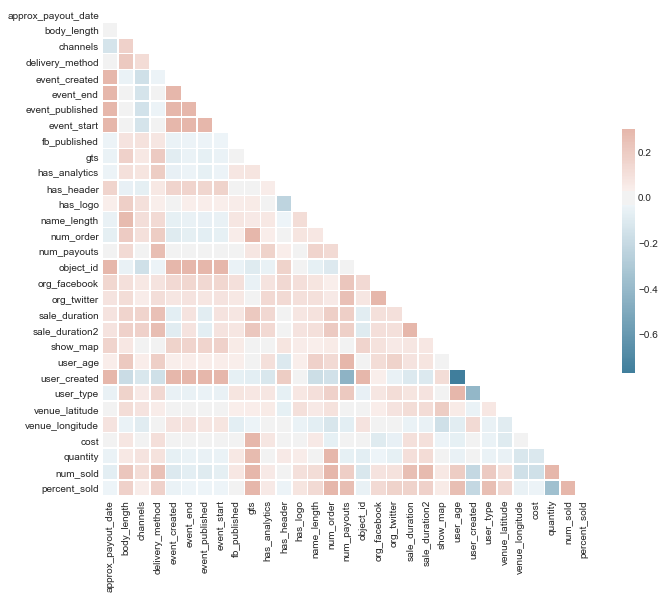

In [121]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrs, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrs, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.savefig('../images/corr_plot.png')